# ** EDA Case Study** 
`Date: 21th September 2020`

Presented By:
- Saphal Rai
- Priteshsingh Chandel

In [46]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [47]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
%matplotlib inline
sns.set(style="whitegrid")


# 1. Reading Application Data

In [48]:
inp1 = pd.read_csv("application_data.csv")

In [49]:
inp1.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### 2. Inspecting application data

In [50]:
inp1.shape


(307511, 122)

In [51]:
inp1.dtypes


SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [52]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [53]:
inp1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### 3 Data Quality Check

### 3.1 Finding percentage of missing values of all the columns and arranging in descending order.

In [54]:
missingVal_percent = (inp1.isnull().sum()/len(inp1))*100
missing_percent_df = pd.DataFrame(data={'Missing_Value_Percentage': missingVal_percent}, index=inp1.columns)
missing_percent_df

,Missing_Value_Percentage
SK_ID_CURR,0.000000
TARGET,0.000000
NAME_CONTRACT_TYPE,0.000000
CODE_GENDER,0.000000
FLAG_OWN_CAR,0.000000
FLAG_OWN_REALTY,0.000000
CNT_CHILDREN,0.000000
AMT_INCOME_TOTAL,0.000000
AMT_CREDIT,0.000000
AMT_ANNUITY,0.003902


### 3.2 Removing columns with > 50% null values

In [55]:
# Dropping rows containing column names that have a missing percentage greater than or equal to (>=) 50%
missing_percent_df = missing_percent_df[missing_percent_df.Missing_Value_Percentage < 50.00]

# checking number of column names remaining after applying above condition
# The output gives 81 such column names who have a missing value value percentage less than 50%
print(missing_percent_df.shape)

(81, 1)


In [56]:
# Using column names from 'missing_percent_df' we will keep only the columns having percentage of missing values less than...
# ... 50% in the 'df' dataset
inp1 = inp1[missing_percent_df.index]

#checking the shape of 'df' dataset  i.e it should have 81 columns in it
inp1.shape

(307511, 81)

In [57]:
# Total number of columns having a missing value percentage between 1% and 15%
missing_percent_df[(missing_percent_df.Missing_Value_Percentage >= 1.00) & (missing_percent_df.Missing_Value_Percentage <= 15.00)]

,Missing_Value_Percentage
AMT_REQ_CREDIT_BUREAU_HOUR,13.501631
AMT_REQ_CREDIT_BUREAU_DAY,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
AMT_REQ_CREDIT_BUREAU_MON,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,13.501631
AMT_REQ_CREDIT_BUREAU_YEAR,13.501631


   ### 3.3 Finding out values to impute for the columns having missing percentage around 13%
    Column Name                     Missing Percentage
    AMT_REQ_CREDIT_BUREAU_QRT       13.50
    AMT_REQ_CREDIT_BUREAU_YEAR      13.50
    AMT_REQ_CREDIT_BUREAU_MON       13.50
    AMT_REQ_CREDIT_BUREAU_HOUR      13.50
    AMT_REQ_CREDIT_BUREAU_DAY       13.50
    AMT_REQ_CREDIT_BUREAU_WEEK      13.50

#### 3.3.1 Reporting best values that can be used for Imputing missing value for above mentioned columns

In [58]:
# Seeing that the above columns have a missing value percentage around 13% which wont impact the column much if ..
# .. the missing values are imputed with the best value like for (categorical=the mode of the column) and for 
# ..(continuous=the median of the column)

# All the above columns contain continuous values within them so we will use each column's median as the best value to impute..
# ..the missing values within each column respectively.

# REASON: As the missing value percentage is very low then it can be fine to impute these missing values with the median/mode..
# .. of the respective columns, as this imputation will not cause adverse effects on the entire dataset.

print('The best values (MEDIAN) for each column to impute inplace of the null values in their respective columns are: ')

for col in missing_percent_df[(missing_percent_df.Missing_Value_Percentage >= 1.00) & (missing_percent_df.Missing_Value_Percentage <= 15.00)].index:
    print(col,'=',inp1[col].median())


The best values (MEDIAN) for each column to impute inplace of the null values in their respective columns are: 
AMT_REQ_CREDIT_BUREAU_HOUR = 0.0
AMT_REQ_CREDIT_BUREAU_DAY = 0.0
AMT_REQ_CREDIT_BUREAU_WEEK = 0.0
AMT_REQ_CREDIT_BUREAU_MON = 0.0
AMT_REQ_CREDIT_BUREAU_QRT = 0.0
AMT_REQ_CREDIT_BUREAU_YEAR = 1.0


### 3.4 Check the datatype of all the columns and change for any two columns if required

In [59]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_P

After analyzing the columns all the datatypes are shown correctly.


Eventhough the datatypes are correctly shown, some of the columns have values that are not semantically correct for
analysis purposes, they are: DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH and DAYS_LAST_PHONE_CHANGE

In [60]:
# Eventhough the datatypes are correctly shown, some of the columns have values that are not semantically correct for..
# ..analysis purposes, they are: DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH and DAYS_LAST_PHONE_CHANGE

# The above mentioned columns contain negative amount of values for days which is to be converted to positive

print(inp1[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].head())


# Converting the values
for col in ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']:
    inp1[col] = inp1[col].apply(lambda x: abs(x))

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0       -9461           -637            -3648.0            -2120   
1      -16765          -1188            -1186.0             -291   
2      -19046           -225            -4260.0            -2531   
3      -19005          -3039            -9833.0            -2437   
4      -19932          -3038            -4311.0            -3458   

   DAYS_LAST_PHONE_CHANGE  
0                 -1134.0  
1                  -828.0  
2                  -815.0  
3                  -617.0  
4                 -1106.0  


In [61]:
# Checking the columns if values converted from negative to positive
# Yes they were converted.
inp1[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']].head(3)

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461,637,3648.0,2120,1134.0
1,16765,1188,1186.0,291,828.0
2,19046,225,4260.0,2531,815.0


### 3.5 For numerical columns check for outliers and report them for atleast 5 variables. Analyze and report them.

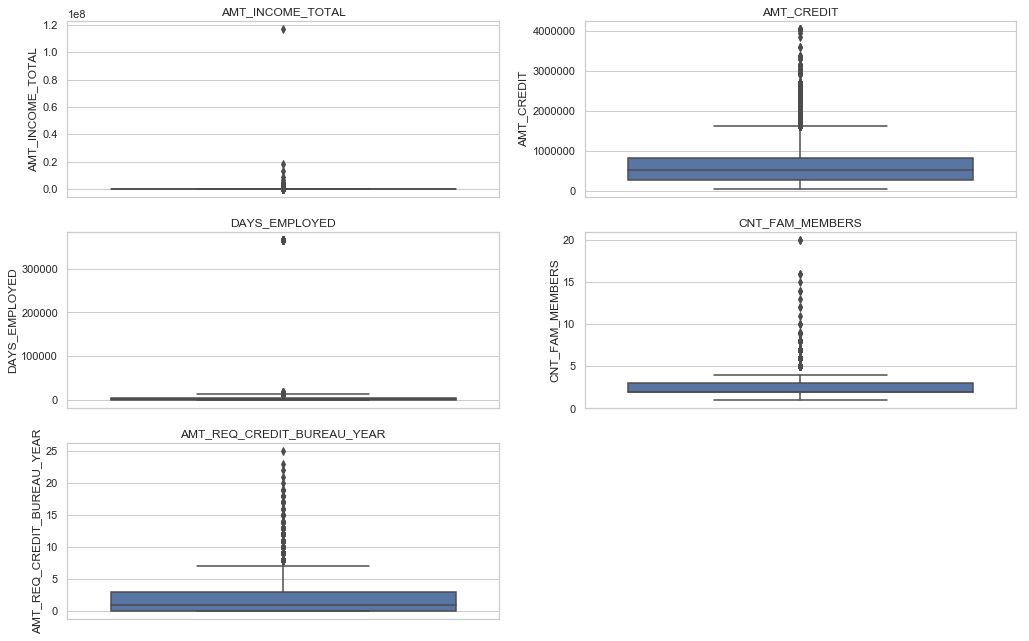

In [62]:
# Checking for outliers in the most relevant numerical columns to identify if these outliers affect the dataset in anyway such

count=0
plt.figure(figsize=(17,11))
for col in ['AMT_INCOME_TOTAL','AMT_CREDIT','DAYS_EMPLOYED','CNT_FAM_MEMBERS','AMT_REQ_CREDIT_BUREAU_YEAR']:
    count+=1
    plt.subplot(3,2,count)
    plt.title(col)
    sns.boxplot(data=inp1,y=col)
plt.show()


The outliers displayed in the above box plots for the most relevant numeric columns for a loan application indicate:
1. `AMT_INCOME_TOTAL` : There are a few outliers present in this boxplot which indicate that there are customers having an income at the high end spectrum of the salaries. Having outliers in this column is only beneficial to the bank as these customers are prime candidates for the loan application and profit of the bank.


2. `AMT_CREDIT` :  In this column's boxplot, there are a high amount of outliers after 18 lakh rupees and higher the amount of Credit given means higher the risk taken by the bank, so until and unless there is a sureity of repayment of the debt by the customer, like putting up an equivalent collateral with the bank(realty, gold, etc) or giving a higher interest on the loan if no collateral, then it not advised to accept the loan application of such a customer with high credit.


3. `DAYS_EMPLOYED` : There outliers present above the value of 300000(3 lakh) days is impossible to occur as the days in a human's lifespan who has lived 120 years = 43800 days, considering the person started working from moment of their birth. So the bank should verify such outlier entries with the respective customers or substitute such outliers with the mode of the column.


4. `CNT_FAM_MEMBERS`: There are a substantial amount of outliers for this boxplot. The higher the number of family members, the more the expenses and impact on finances of these family members if this applicant is the sole earner in the house which could indicate towards difficulty in EMI payments to the bank by the customer. Hence, the bank must take required steps to ensure that the customer will not have any payment difficulties by keeping collateral else deny the loan application for that applicant.


5. `AMT_REQ_CREDIT_BUREAU_YEAR` : Usually a good rule of thumb that the bank follow is that a customer must have one request hard credit request per three months i.e 4 to 5 hard requests for credit score to Credit Bureau in a year because more the number of such requests, lesser the likelihood of the bank accepting your loan, as each hard request cuts off points from your credit score. Hence, to be on the safer side, the outliers present above the value 10 can be strong indicators of customers who may have a bad credit score and so have them checked out.

### 3.6 Binning of continuous variables such as AMT_INCOME_TOTAL and AMT_CREDIT

In [63]:
# creating income category for binning
#  Low Income 0 - 50000
#  Average Income 50000 - 500000
#  High Income 500000 - 5000000
#  Very High Income  > 5000000

inp1['INCOME_CAT'] = inp1.AMT_INCOME_TOTAL.apply(lambda x: "Low Income" if (x > 0 and x < 50000) 
                                    else ("Average Income" if (x >= 50000 and x < 500000) 
                                         else "High Income" if (x >= 500000 and x < 5000000) else "Very High Income"))
df_income = inp1.groupby('INCOME_CAT')['SK_ID_CURR'].nunique()
df_income

INCOME_CAT
Average Income      300292
High Income           2697
Low Income            4517
Very High Income         5
Name: SK_ID_CURR, dtype: int64

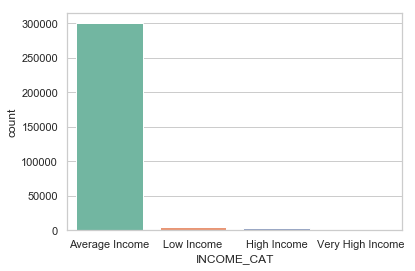

In [64]:
sns.countplot(inp1["INCOME_CAT"], palette="Set2")

In [65]:
# creating Loan Amount category for binning
#  Low Loan Amount 0 - 100000
#  Average Loan Amount 100000 - 1500000
#  High Loan Amount 1500000 - 3000000
#  Very High Loan Amount  > 3000000

inp1['CREDIT_CAT'] = inp1.AMT_CREDIT.apply(lambda x: "Low Loan Amount" if (x > 0 and x < 100000) 
                                    else ("Average Loan Amount" if (x >= 100000 and x < 1500000) 
                                         else "High Loan Amount" if (x >= 1500000 and x < 3000000) else "Very High Loan Amount"))
inp1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_CAT,CREDIT_CAT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Average Income,Average Loan Amount
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Average Income,Average Loan Amount
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Average Income,Average Loan Amount
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Average Income,Average Loan Amount
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Average Income,Average Loan Amount


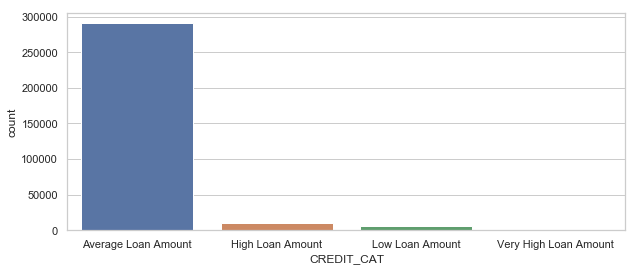

In [66]:
plt.figure(figsize=[10,4])
sns.countplot(inp1["CREDIT_CAT"])

### 4 Analysis

### 4.1 Check imbalance percentage

In [67]:
round(100* (inp1['TARGET'].value_counts()/len(inp1)),2)

0    91.93
1     8.07
Name: TARGET, dtype: float64

#### The imbalance percentage is
    0 - 91.93%
    1 - 8.07%

### 4.2 Divide the data into 2 sets i.e.,: Target =1 and Target = 0

In [68]:
df1 = inp1[inp1['TARGET'] == 1]
df1.shape

(24825, 83)

In [69]:
df0 = inp1[inp1['TARGET'] == 0]
df0.shape

(282686, 83)

### 4.3 Perform univariate analysis for categorical variables for both 0 and 1 data. Compare the target variable.

In [70]:
df0.nunique().sort_values()

TARGET                               1
REG_REGION_NOT_WORK_REGION           2
FLAG_DOCUMENT_15                     2
LIVE_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY               2
REG_CITY_NOT_WORK_CITY               2
LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_19                     2
FLAG_DOCUMENT_18                     2
EMERGENCYSTATE_MODE                  2
FLAG_DOCUMENT_17                     2
FLAG_DOCUMENT_2                      2
FLAG_DOCUMENT_3                      2
FLAG_DOCUMENT_4                      2
FLAG_DOCUMENT_5                      2
FLAG_DOCUMENT_6                      2
FLAG_DOCUMENT_7                      2
FLAG_DOCUMENT_8                      2
FLAG_DOCUMENT_9                      2
FLAG_DOCUMENT_10                     2
FLAG_DOCUMENT_11                     2
FLAG_DOCUMENT_12                     2
FLAG_DOCUMENT_13                     2
FLAG_DOCUMENT_14                     2
REG_REGION_NOT_LIVE_REGION           2
FLAG_EMAIL               

### 4.3.1Creating functions of Univariate and Bivariate Analysis:

In [167]:
# Univariate Analysis Function for categorical variables

def univariate_cat(colName: str):
    plt.figure(figsize=[12,8])
    plt.subplot(2,1,1, title = "Target = 0")
    df0[colName].value_counts(normalize=True).plot.barh()
    plt.subplot(2,1,2, title= 'Target = 1')
    df1[colName].value_counts(normalize=True).plot.barh()
    return plt.show()

In [168]:
# Univarite Analysis Function for numerical variables

def univariate_num(colName: str):
    plt.figure(figsize=[11,10])
    plt.tight_layout()
    plt.subplot(2,1,1, title = "Target = 0")
    sns.boxplot(df0[colName])
    plt.subplot(2,1,2, title = "Target = 1")
    sns.boxplot(df1[colName])
    return plt.show()

In [169]:
# Bivariate Analysis Function

def bivariate(colName1: str, colName2: str):
    plt.figure(figsize=[7,12])
    plt.subplot(2,1,1, title = "Target = 0")
    plt.scatter(x = df0[colName1], y = df0[colName2])
    plt.xlabel(xlabel=colName1)
    plt.ylabel(ylabel=colName2)
    plt.subplot(2,1,2, title = "Target = 1")
    plt.scatter(x = df1[colName1], y = df1[colName2])
    plt.xlabel(xlabel=colName1)
    plt.ylabel(ylabel=colName2)
    return plt.show()

## 4.4 UNIVARIATE ANALYSIS FOR CATEGORICL VARIABLES

### Education type variable

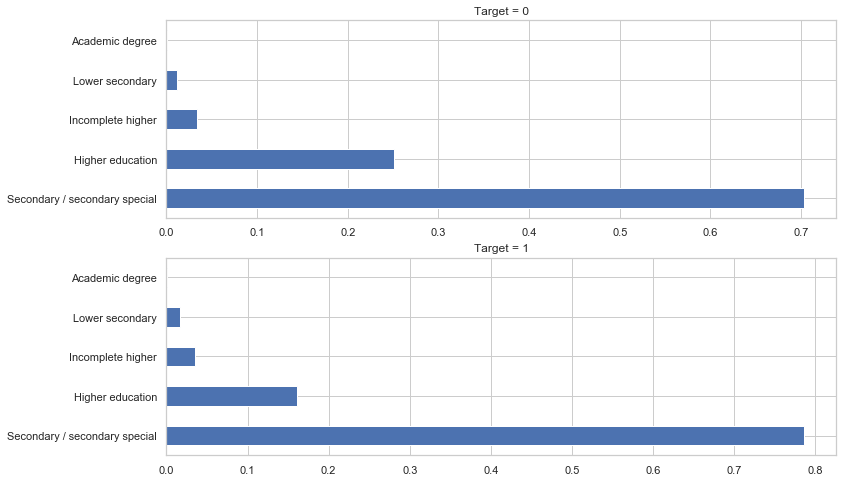

In [170]:
univariate_cat('NAME_EDUCATION_TYPE')

### Result:
- The Secondary/secondary special Education Type is a tad higher in the defaulters (Target 1) compared to non-defaulter(Target 0)

### Occupation type variable.

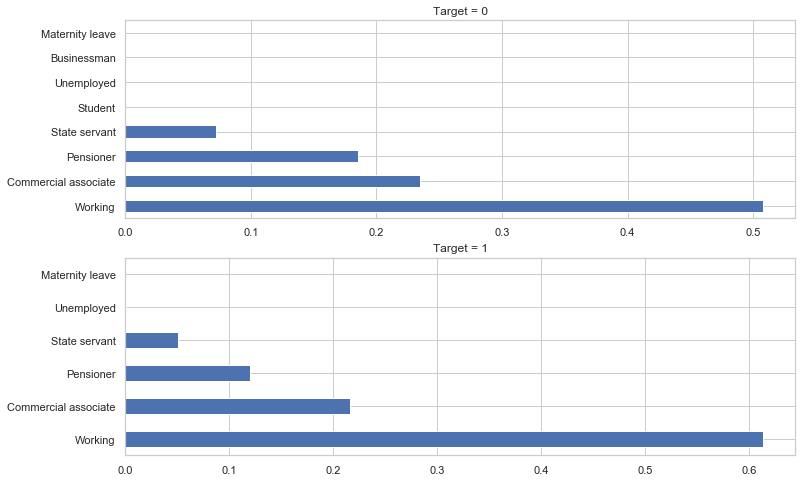

In [171]:
univariate_cat('NAME_INCOME_TYPE')

### Result:
- Through the above graphs we realize that the major loan applicants are the "Working" class INCOME_TYPE and the 'Working' class INCOME_TYPE is a tad higher in the defaulter's graph(Target 1) compared to the non-defaulter's graph(Target 0).


### NAME_CONTRACT_TYPE variable 

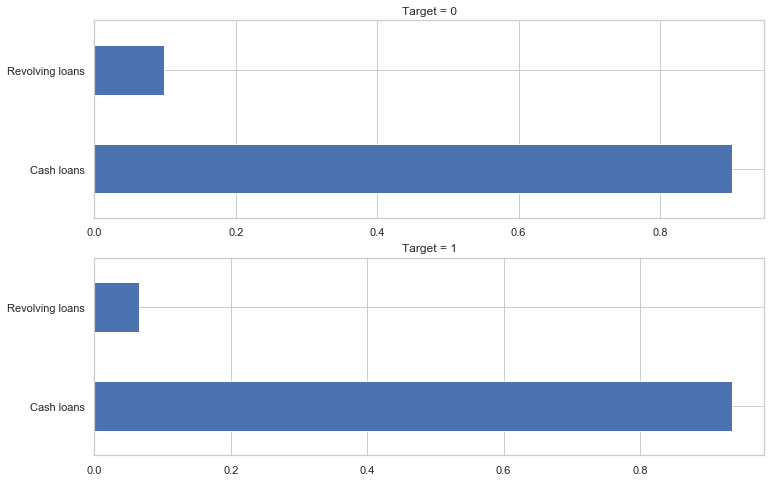

In [172]:
univariate_cat('NAME_CONTRACT_TYPE')

### Result:
- The above graphs are very closely the same and do not convey any insights on the possibility of default on loans.

### FLAG_OWN_REALTY variable

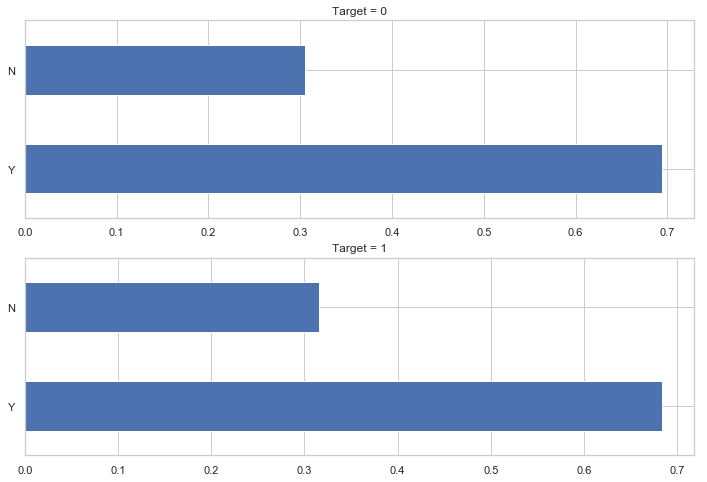

In [173]:
univariate_cat('FLAG_OWN_REALTY')

### Result:
- Owning of a realty is not a major factor in predicting will default a loan or not.

###  INCOME_CAT variable

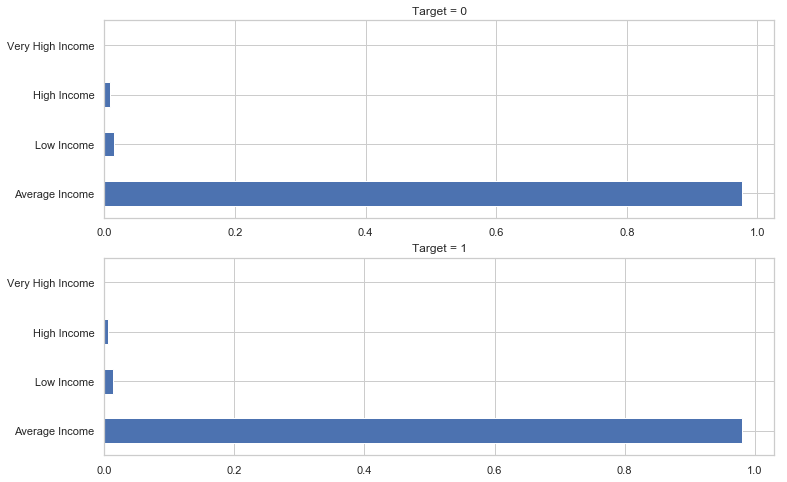

In [174]:
univariate_cat('INCOME_CAT')

### Result:
- As both the graphs are identical for both TARGETs 0 & 1. We cannot assume that the INCOME_CAT is a major factor in predicting a default in loan.

### CREDIT_CAT variable

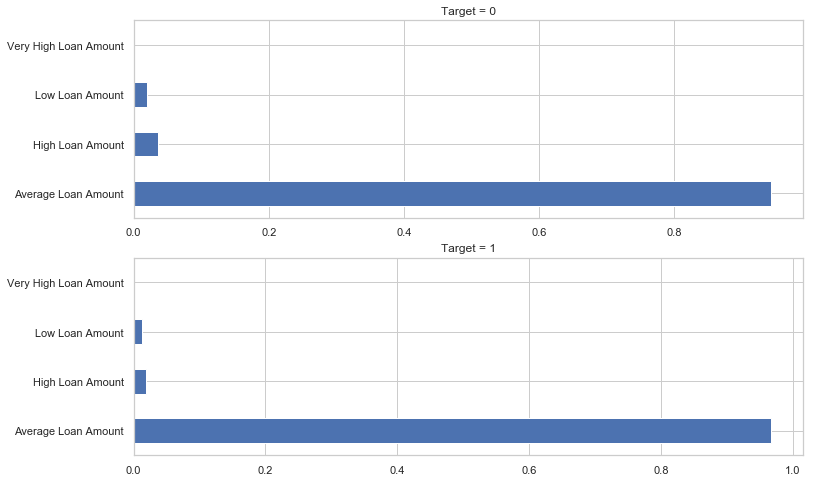

In [175]:
univariate_cat('CREDIT_CAT')

## 4.5 Perform univariate analysis for numerical variables for both 0 and 1 data.

### AMT_CREDIT variable

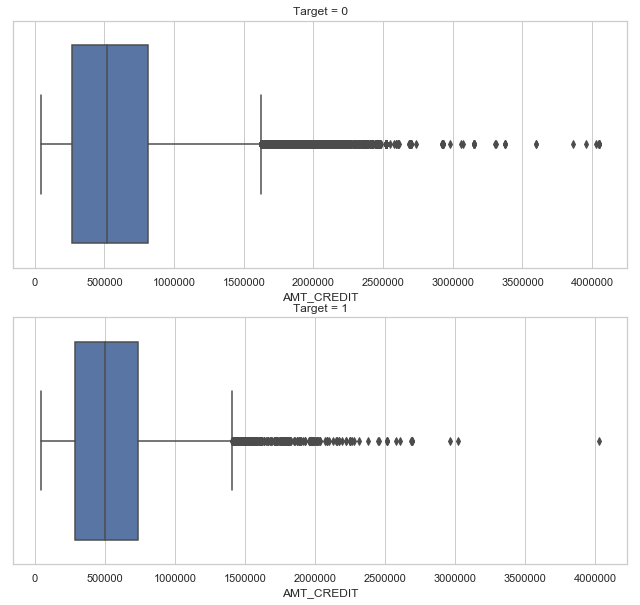

In [176]:
# Analysing Credit amount of the loan
univariate_num('AMT_CREDIT')

#### Result:
- Loan amount > 25,00,000, few clients have payment difficulties.

### AMT_INCOME_TOTAL variable

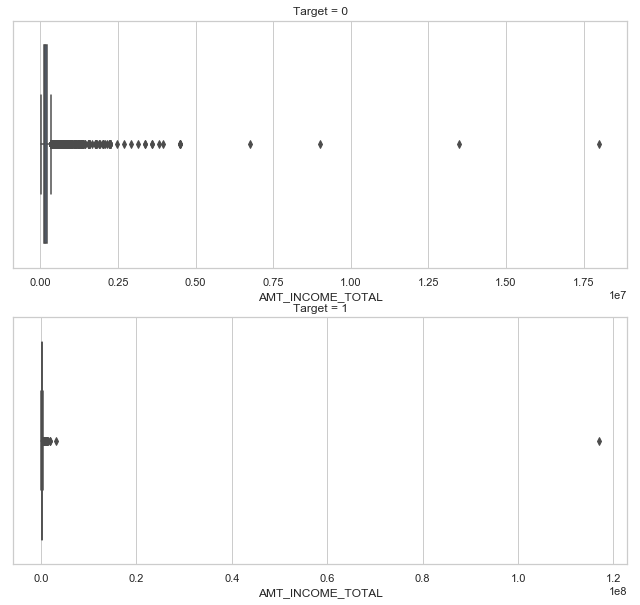

In [177]:
#changing the unit of Income column to Thousands.
univariate_num('AMT_INCOME_TOTAL')

#### Result:
- Client with more income have less difficulty in payment. Few outliers in Target = 1.


#### AMT_REQ_CREDIT_BUREAU_YEAR variable

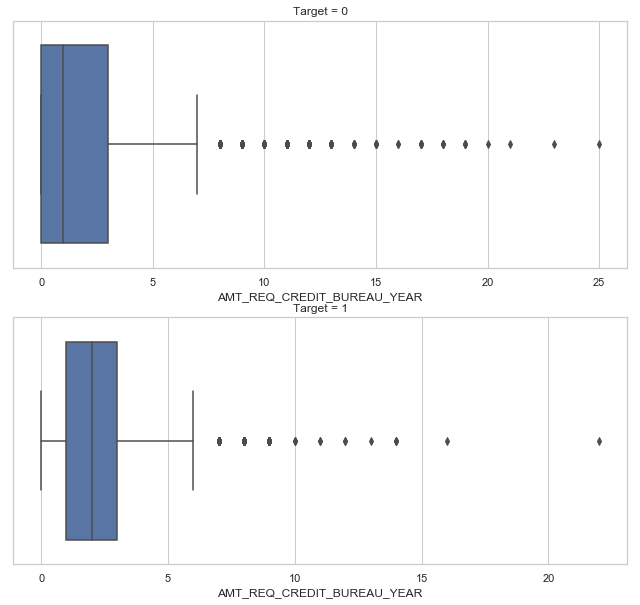

In [178]:

univariate_num('AMT_REQ_CREDIT_BUREAU_YEAR')

#### Result:
- As the 50% and 75% quantile of the defaulters(Target 1) is higher than the non-defaulters(Target 0) we can assume that the more the number of hard requests to Credit Bureau the more bad the Credit Score of the applicant and hence more the likelihood of the applicant being rejected in the loan application.

#### NAME_EDUCTAION_TYPE and NAME_INCOME_TYPE variables

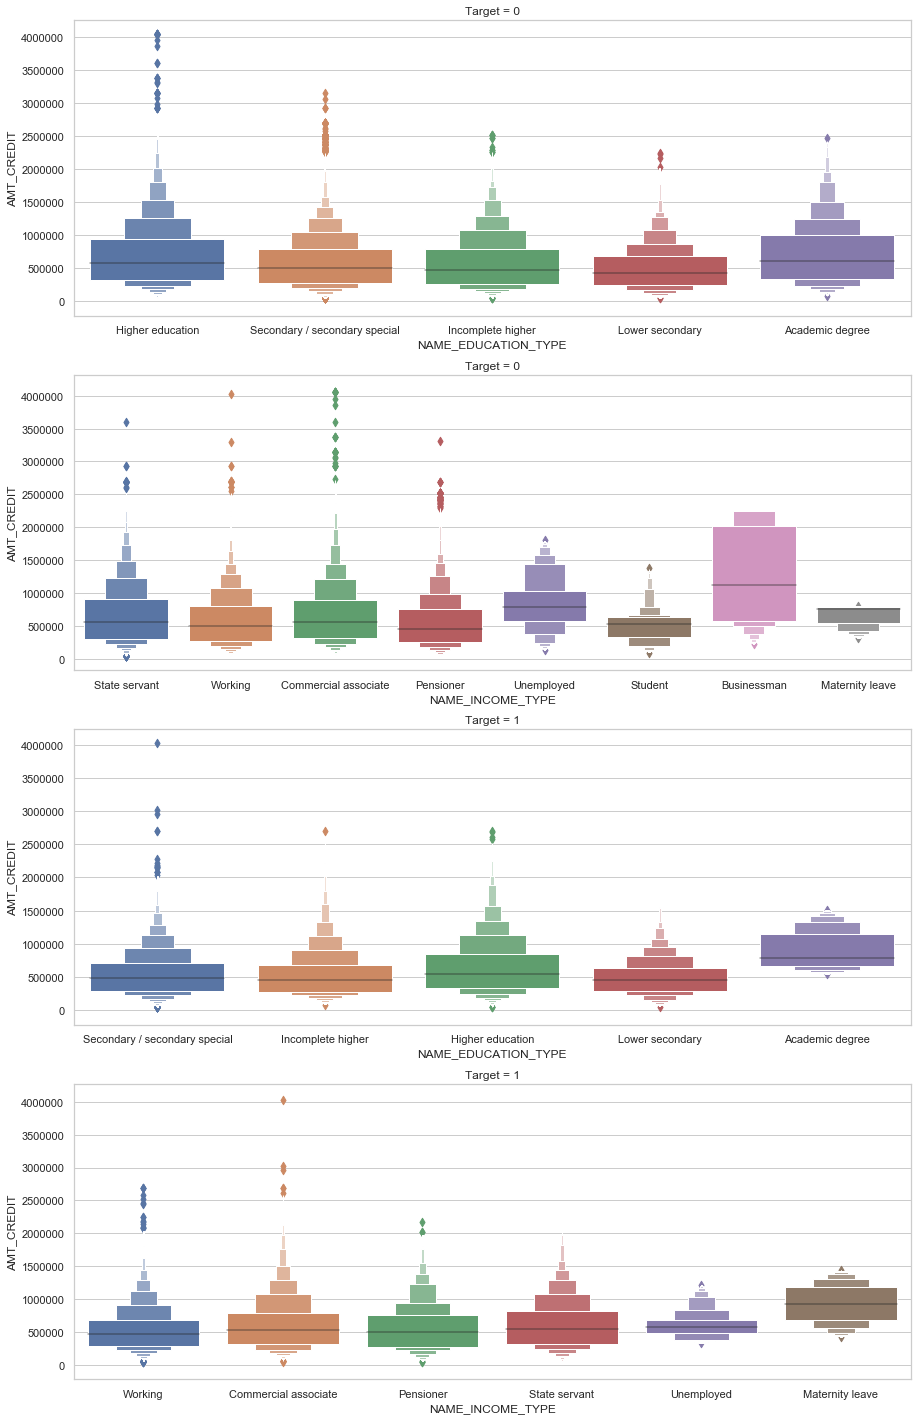

In [179]:
# Analysing NAME_EDUCATION_TYPE and NAME_INCOME_TYPE with respect to credited amount.
plt.figure(figsize = [15,25])
category = ['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE']
for i in enumerate(category):
    plt.subplot(4,1,i[0] + 1,  title = "Target = 0")
    sns.boxenplot(x=i[1], y= df0['AMT_CREDIT'], data = df0)

for i in enumerate(category):
    plt.subplot(4,1,i[0] + 3,  title = "Target = 1")
    sns.boxenplot(x=i[1], y= df1['AMT_CREDIT'], data = df1)

#### Result:
- Businessman and students have not defaulted. Clients on maternity leave have  payment difficulties.

### 4.6 Check the variables with highest correlation are the same in bolth files

#### 4.6.1 Find correlation of numerical columns for both the cases 0 and 1|

In [198]:
# 10 numerical columns considered - AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'CNT_CHILDREN','CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE

# Analysis for Target = 0
corr_target_0 = df0[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'CNT_CHILDREN','CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_YEAR']].corr()

In [199]:
corr_0 = corr_target_0.where(np.triu(np.ones(corr_target_0.shape), k=1).astype(np.bool)).unstack().reset_index()
corr_0.columns = ['VAR1','VAR2', 'Correlation_Target_0' ]
corr_0.dropna(subset = ['Correlation_Target_0'], inplace = True)
corr_0.sort_values('Correlation_Target_0', ascending = False)

,VAR1,VAR2,Correlation_Target_0
34,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
95,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
35,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
23,AMT_ANNUITY,AMT_CREDIT,0.771309
59,DAYS_EMPLOYED,DAYS_BIRTH,0.626114
22,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953
33,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462
11,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
71,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.276663
70,DAYS_ID_PUBLISH,DAYS_BIRTH,0.271314


In [200]:
# Analysis for Target = 1
corr_target_1 = df1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'CNT_CHILDREN','CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE']].corr()

In [201]:
corr_1 = corr_target_1.where(np.triu(np.ones(corr_target_1.shape), k=1).astype(np.bool)).unstack().reset_index()
corr_1.columns = ['VAR1','VAR2', 'Correlation_Target_1' ]
corr_1.dropna(subset = ['Correlation_Target_1'], inplace = True)
corr_1.sort_values('Correlation_Target_1', ascending = False)

,VAR1,VAR2,Correlation_Target_1
45,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
107,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
46,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699
23,AMT_ANNUITY,AMT_CREDIT,0.752195
71,DAYS_EMPLOYED,DAYS_BIRTH,0.582185
82,DAYS_ID_PUBLISH,DAYS_BIRTH,0.252863
83,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.229090
59,DAYS_BIRTH,AMT_GOODS_PRICE,0.135810
56,DAYS_BIRTH,AMT_CREDIT,0.135316
117,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,0.123951


#### Result:
- Highest correlation is same in both files "AMT_GOODS_PRICE and AMT_CREDIT"

### Correlation Heatmap 

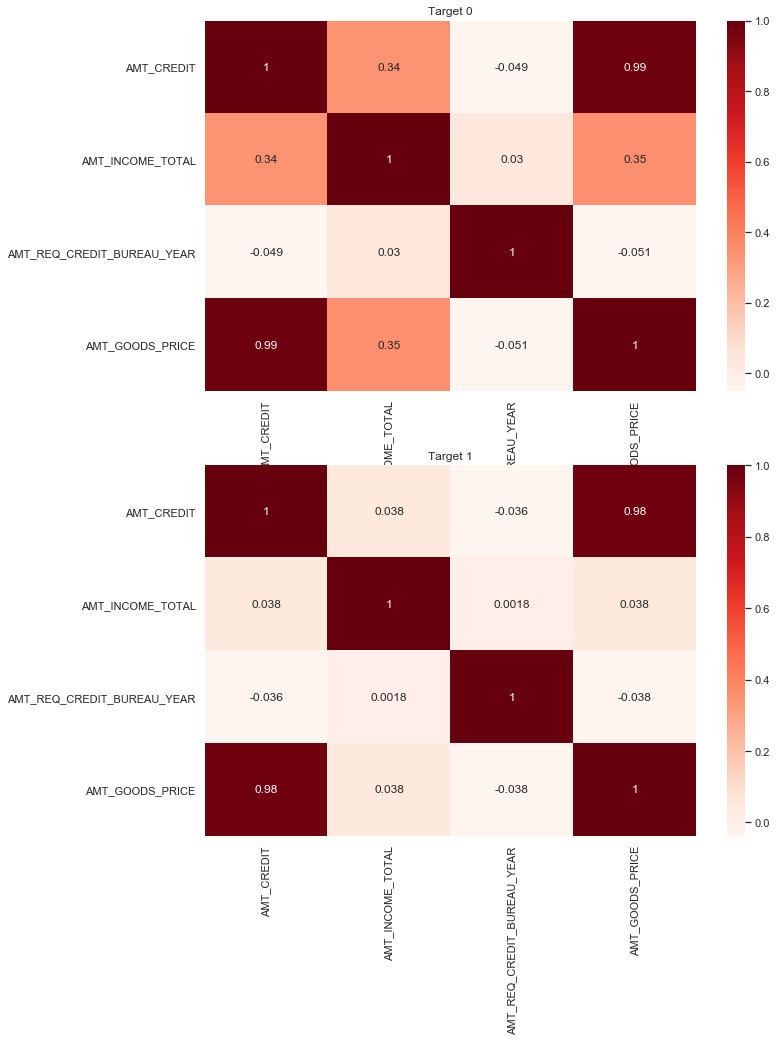

In [214]:
# Using the most relevant columns which can be used to deduce the default of loan, we check the correlation between these columns
# The columns are: 'AMT_CREDIT','AMT_INCOME_TOTAL','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_GOODS_PRICE'

plt.figure(figsize=[11,15])
plt.subplot(2,1,1)
plt.title("Target 0")
sns.heatmap(df0[['AMT_CREDIT','AMT_INCOME_TOTAL','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_GOODS_PRICE']].corr(), annot=True,cmap='Reds')
plt.subplot(2,1,2)
plt.title("Target 1")
sns.heatmap(df1[['AMT_CREDIT','AMT_INCOME_TOTAL','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_GOODS_PRICE']].corr(), annot=True,cmap='Reds')
plt.show()

#### Result:

- There is a very high correlation between the Goods Price to the Credit Amount offered by the bank because the bank will offer a near approximately close credit amount as the goods price.


- There is also a positive correlation between the Total income of the customer to the Credit offered by the bank because higher the income greater likelihood of complete repayment of the loan amount.


- There is a negative correlation between the Total Credit Requests in Year and Credit Amount offered by the bank because higher the number of requests for credit to the Credit Bureau, more likely the applicant has a bad credit score and for every credit request a few points are cut from the customer's Credit Score. So if Ammount of Credit Requests increases, then the Credit amount offered to the applicant is very less or with a higher interest rate.


- `Hence, AMT_CREDIT, AMT_INCOME_TOTAL, AMT_REQ_CREDIT_BUREAU_YEAR', AMT_GOODS_PRICE variables can be used to determine whether the loan applicant will be likely to default on their loan. `

### 4.7 Bivariate analysis for numerical variables for both 0 and 1 data.

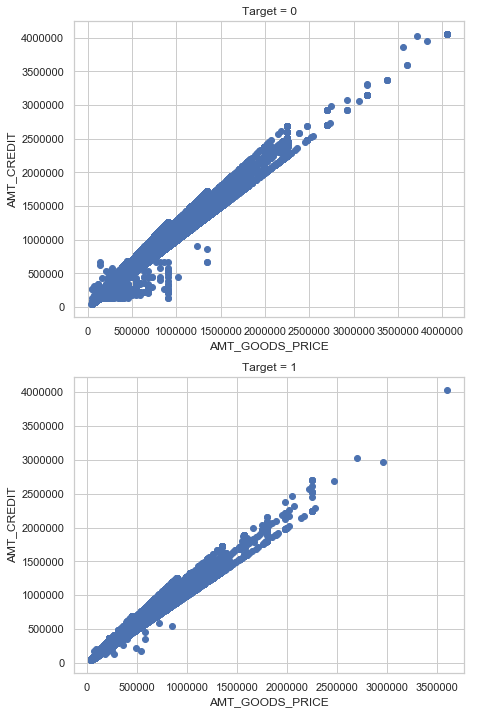

In [184]:
# Plot AMT_GOODS_PRICE Vs AMT_CREDIT

bivariate('AMT_GOODS_PRICE','AMT_CREDIT')

#### Result:
- Scatterplot confirms the correlation matrix that AMT_GOODS_PRICE and AMT_CREDIT are highly and positively correlated, meaning:

`The higher the Goods Price for the customer to purchase, the more the bank offers a Credit Amount close to the Goods Price`

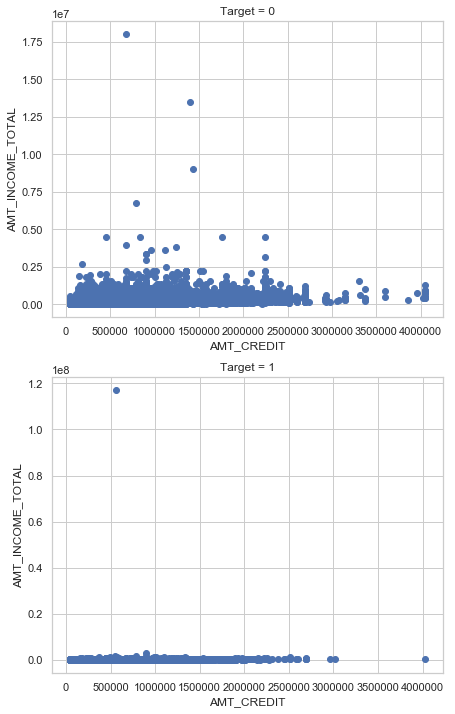

In [185]:
# Plot AMT_CREDIT and AMT_INCOME_TOTAL

bivariate('AMT_CREDIT','AMT_INCOME_TOTAL')

### Result:
- It does not show any correlation between AMT_CREDIT and AMT_INCOME_TOTAL columns because:
1. If the income is high then credit can be low or high
2. If the income is low then credit can also be low or high
- Hence the two columns are not correlated.

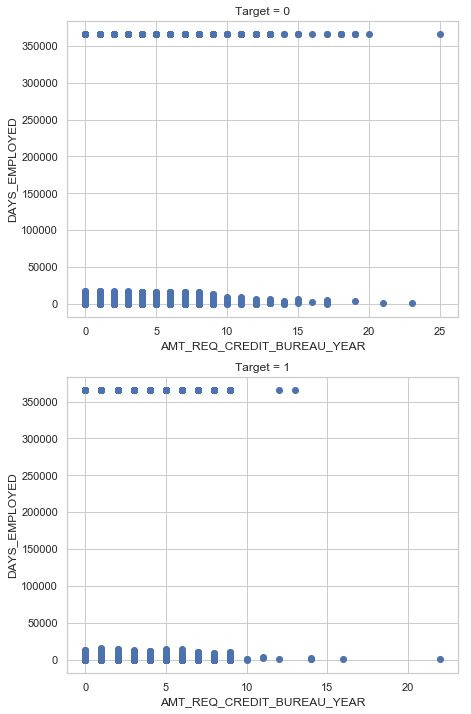

In [186]:
# Plot AMT_REQ_CREDIT_BUREAU_YEAR, DAYS_EMPLOYED variables

bivariate('AMT_REQ_CREDIT_BUREAU_YEAR','DAYS_EMPLOYED')

#### Result:
- The scatter plot distribution for both the targets does not provide any relation between the columns giving no insight to the deafult of loan

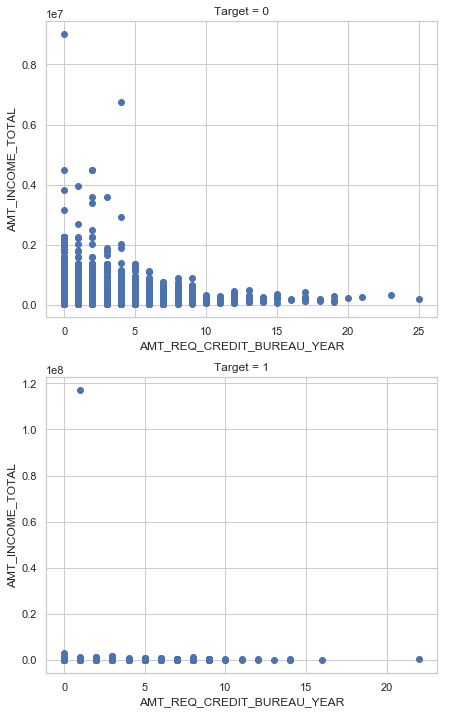

In [187]:
# PLot 'AMT_REQ_CREDIT_BUREAU_YEAR' and 'AMT_INCOME_TOTAL' variables

bivariate('AMT_REQ_CREDIT_BUREAU_YEAR','AMT_INCOME_TOTAL')

#### Result:
- The scatter plot distribution for both the targets does not provide any relation between the columns giving no insight to the deafult of loan

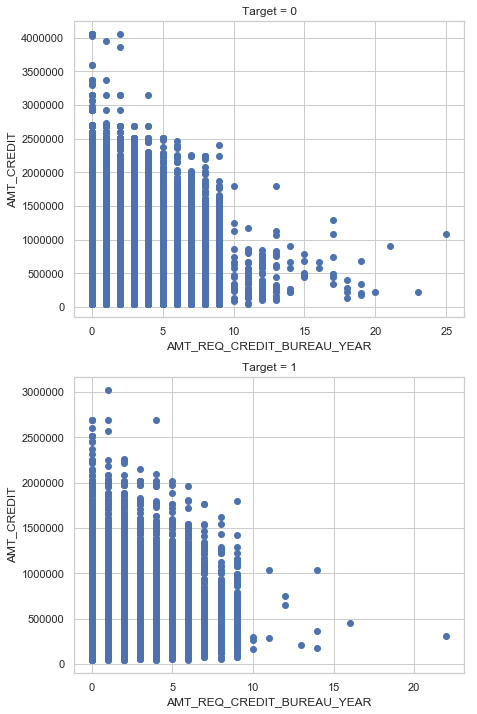

In [188]:
#Plot 'AMT_REQ_CREDIT_BUREAU_YEAR' and 'AMT_CREDIT' variables

bivariate('AMT_REQ_CREDIT_BUREAU_YEAR','AMT_CREDIT')

#### Result:
- The scatter plot distribution for both the targets provides a negative correlation between the AMT_CREDIT and AMT_REQ_CREDIT_BUREAU_YEAR meaning:

`The more the number of hard requests/enquiries to Credit Bureau about the loan applicant, lesser the credit amount offered to the loan applicant`

# 5.1 Read Previous application data

In [189]:
inp2 = pd.read_csv("previous_application.csv")
inp2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
inp2.nunique().sort_values()

NFLAG_INSURED_ON_APPROVAL            2
NFLAG_LAST_APPL_IN_DAY               2
FLAG_LAST_APPL_PER_CONTRACT          2
NAME_PRODUCT_TYPE                    3
NAME_CLIENT_TYPE                     4
NAME_CONTRACT_STATUS                 4
NAME_PAYMENT_TYPE                    4
NAME_CONTRACT_TYPE                   4
NAME_PORTFOLIO                       5
NAME_YIELD_GROUP                     5
WEEKDAY_APPR_PROCESS_START           7
NAME_TYPE_SUITE                      7
CHANNEL_TYPE                         8
CODE_REJECT_REASON                   9
NAME_SELLER_INDUSTRY                11
PRODUCT_COMBINATION                 17
HOUR_APPR_PROCESS_START             24
RATE_INTEREST_PRIVILEGED            25
NAME_CASH_LOAN_PURPOSE              25
NAME_GOODS_CATEGORY                 28
CNT_PAYMENT                         49
RATE_INTEREST_PRIMARY              148
SELLERPLACE_AREA                  2097
DAYS_TERMINATION                  2830
DAYS_FIRST_DRAWING                2838
DAYS_LAST_DUE            

In [191]:
inp2.shape

(1670214, 37)

In [192]:
inpmerge = inp1.merge(inp2, left_on='SK_ID_CURR', right_on='SK_ID_CURR')

In [193]:
inpmerge.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_CAT,CREDIT_CAT,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Average Income,Average Loan Amount,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Average Income,Average Loan Amount,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Average Income,Average Loan 

In [194]:
inpmerge.shape

(1413701, 119)

### 5.2 Perform univariate and bivariate analysis.

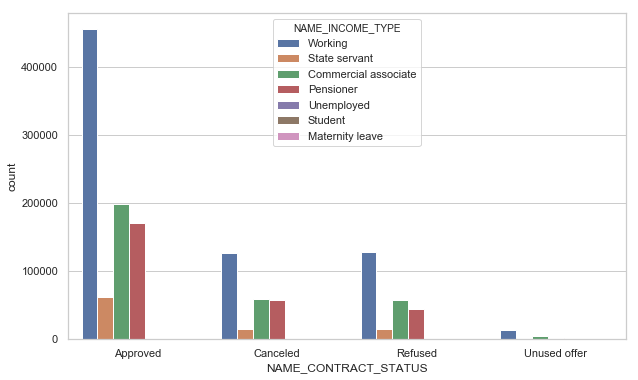

In [195]:
# Check contract status with hue as Income type
plt.figure(figsize=[10,6])
sns.countplot(inpmerge['NAME_CONTRACT_STATUS'],hue = inpmerge['NAME_INCOME_TYPE'])


#### Working people have applied more for loans.

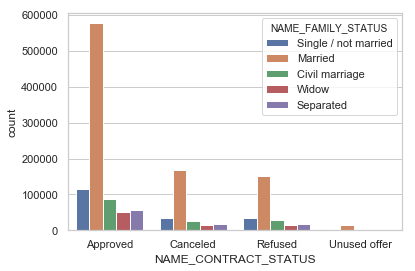

In [196]:
# check contract status with hue as Marital Status
sns.countplot(inpmerge['NAME_CONTRACT_STATUS'],hue = inpmerge['NAME_FAMILY_STATUS'])

#### More loan are from married people.

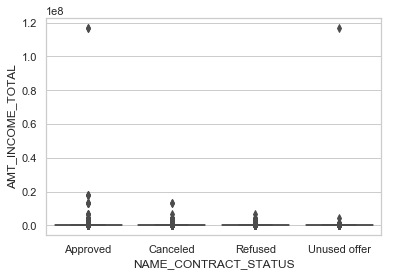

In [197]:
sns.boxplot(x=inpmerge['NAME_CONTRACT_STATUS'], y= inpmerge['AMT_INCOME_TOTAL'], data = inpmerge)

### Conclusions

1. Highest correlation is between the price of the goods and Credit amount of the loan
2. High loan approval were for working people 
3. Highest loan approned for Married people 
